<a href="https://colab.research.google.com/github/a-forty-two/diamler_17_jan/blob/main/02_Time_Series_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd

In [41]:
data = pd.read_excel('https://github.com/a-forty-two/diamler_17_jan/blob/main/Sample-Superstore.xls?raw=true')

In [42]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [43]:
print('Earliest = ' + str(data['Order Date'].min()))
print('Last ord = ' + str(data['Order Date'].max()))
# Jan 1,2 2014, Dec 31 2017=? Missing in the extremes of dataset


Earliest = 2014-01-03 00:00:00
Last ord = 2017-12-30 00:00:00


In [44]:
smalldata = data.loc[:, ['Order Date','Category','Sales','Quantity','Discount'	,'Profit']]

In [45]:
smalldata.shape

(9994, 6)

In [46]:
for colname in smalldata.columns:
  print(colname + ' : ' + str(smalldata[colname].value_counts().count()))
  # prints all unique values' count inside column

Order Date : 1237
Category : 3
Sales : 6144
Quantity : 14
Discount : 12
Profit : 7545


In [47]:
smalldata['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [48]:
# let's pick any one category 
usefuldata = smalldata[smalldata['Category']=='Furniture']
usefuldata.head()

,Order Date,Category,Sales,Quantity,Discount,Profit
0,2016-11-08,Furniture,261.9600,2,0.00,41.9136
1,2016-11-08,Furniture,731.9400,3,0.00,219.5820
3,2015-10-11,Furniture,957.5775,5,0.45,-383.0310
5,2014-06-09,Furniture,48.8600,7,0.00,14.1694
10,2014-06-09,Furniture,1706.1840,9,0.20,85.3092


In [49]:
usefuldata.shape

(2121, 6)

In [50]:
usefuldata['Order Date'].value_counts().count()

889

In [51]:
# we already know that our data spans from 3 Jan 2014 to 30 Dec 2017
# 365.25 X 4 years - missing days
# 1461 - 3 = 1458 unique were expected!
# but we have only 889
# this means that multiple orders are placed on same date!

In [52]:
dailyfurnituredata = usefuldata.groupby('Order Date').sum()
dailyfurnituredata.tail()
# No orders present for Dec 26,27,31-> these are MISSING VALUES!
# because of this-> we cannot make daily predictions!
# Observe-> Order Date (because of groupby) has been set as index to avoid repeating values!

,Sales,Quantity,Discount,Profit
Order Date,,,,
2017-12-24,1393.4940,14,0.50,222.9092
2017-12-25,832.4540,14,0.80,-7.0763
2017-12-28,551.2568,17,2.02,-49.6680
2017-12-29,2330.7180,26,0.20,492.6236
2017-12-30,323.1360,4,0.20,12.1176


In [53]:
# last week-> time grouping-> resample -> AS, MS
# convert -> daily data (sum of all cols on that date) to MONTHLY data!
# aggregation SHOULD not be SUM-> because MONTHS are NOT of the same length!
# comparison should always be on same scale-> MEAN
# average sales per day of that month

In [54]:
# 10AS-> 10*Annual Sum-> decade sum
# MS-> Monthly sum
monthlyfurnituredata = dailyfurnituredata.resample('MS').mean()
monthlyfurnituredata.head()

,Sales,Quantity,Discount,Profit
Order Date,,,,
2014-01-01,480.194231,5.384615,0.207692,61.958962
2014-02-01,367.931600,4.600000,0.160000,24.138340
2014-03-01,857.291529,7.705882,0.447059,-66.391471
2014-04-01,567.488357,5.785714,0.246429,39.598579
2014-05-01,432.049187,6.062500,0.384375,-21.867350


In [55]:
# by logic-> 4 years-> 12 X 4 = 48 rows
monthlyfurnituredata.shape
# this time there are NO missing values!
# because data is monthly, our predictions will also be MONTHLY!
# if we were making daily, weekly, monthly predictions
# we would have made most mistakes in daily predictions


(48, 4)

<Figure size 432x288 with 0 Axes>

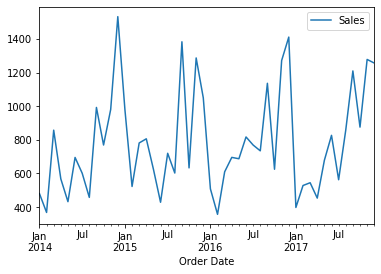

In [56]:
import matplotlib.pyplot as plt
plt.figure()
monthlyfurnituredata[['Sales']].plot()
plt.show()


In [57]:
# instead of solving 1 complex graph
# break it into 3 simpler graphs
# Graphs follow vector math
# Graph A( 2,2) can be broken into Graph B (1,1) and C (1,1)
# graph A = graph b + graph c
# axis-> i and j
# grpah A-> 2i + 2j
# graph B -> i + j; graph d-> 4i + 3j
# graph C -> i + j; graph e-> -2i - j
# graph A = graph B + graph C
# or graph A = graph d + graph e
# decomposing the graph!

# our graph follow time series
# slope of the graph-> dy/dt the entire graph!-> tells you the direction of series
# season or period-> data thats repeating across entire graph
#         original - slope = a new graph
#         in this new graph-> vector that can be added to entire graph to create a pattern
#         -> patterns that's repeating 
# noise or residue-> external factors that impact our data
#         -> original - slope - season
#         -> whatever's left!!!
# slope + season + noise = original graph

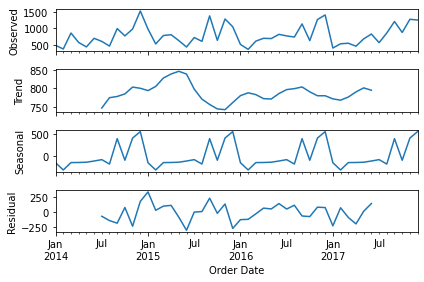

In [58]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(monthlyfurnituredata[['Sales']], model='additive')
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

fig = decomposition.plot()
plt.show() 

In [59]:
# 3 graphs-> Trend, Seasonal, Residue 
# ARIMA-> Auto Regression integrated Moving Averages 

In [60]:
# p,d,q -> p -> autoregressive terms 
# d-> not impacted by season
# q-> lagged forecast errors 

In [61]:
# we do not know which combinations here to pick
# thus, we are going to try ALL combinations

In [62]:
# paramters- provided by the data
# hyperparameters- set by the developer
# OUR HP- ARIMA-> p,d,q, use Trend?, use Season?, use Residue?

In [63]:
# exhaustive search to generate all possible combinations of these HPs
# Grid Search -> exhaustive generation of all possible HP combinations 
# gives you the metric for each combination
# then we select the best metric!

#alternate approaches:
# 1) Randomized Search-> some problems are infinite. We cannot generate ALL possible 
# combinations. Thats why we generate a random subset of HPs, and then select
# a workable HP set from the random values.
# this does not give us best HP, but workable ones!

# 2) Bayesian Search-> next set of HP such that they are 'probabilistically' better
# than the previous selection 

In [64]:
# generate all possible p,d,q
import itertools
p = d = q = range(0,2) # VALUE generators between [0,1] 
pdq = list(itertools.product(p,d,q))
print(pdq)


[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [65]:
# S,T,R with S, P, D, Q where season= 12 months


In [66]:
# 
seasons = 12
seasonal_pdq = [(x[0],x[1],x[2], seasons)  for x in pdq] 
# if x was (0,1,0), -> (0,1,0,12)
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[0]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[1]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[2]))
print('SARIMAX individual MODEL = {} X {}'.format(pdq[5], seasonal_pdq[3]))


SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 0, 1, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 0, 12)
SARIMAX individual MODEL = (1, 0, 1) X (0, 1, 1, 12)


In [67]:
min_pdq = (999,999,999)
min_spdq = (999,999,999,12)
min_AIC = 999
y = monthlyfurnituredata['Sales']
for param in pdq:
  for sparam in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=sparam, enforce_stationarity=False)
      predictions = model.fit()
      print('Model={}X{}. AIC= {}'.format(param, sparam, predictions.aic))
      if(predictions.aic < min_AIC):
        min_pdq = param
        min_spdq = sparam
        min_AIC = predictions.aic
    except Exception as e:
      print(e)
      continue

print('**** Smallest PDQ,SPDQ is *****')
print(min_AIC)
print(min_pdq)
print(min_spdq)

Model=(0, 0, 0)X(0, 0, 0, 12). AIC= 769.0817523205916
Model=(0, 0, 0)X(0, 0, 1, 12). AIC= 548.1753929571319
Model=(0, 0, 0)X(0, 1, 0, 12). AIC= 477.71701309202774
maxlag should be < nobs
Model=(0, 0, 0)X(1, 0, 0, 12). AIC= 497.2314433418337
Model=(0, 0, 0)X(1, 0, 1, 12). AIC= 478.3653791055623
Model=(0, 0, 0)X(1, 1, 0, 12). AIC= 318.0047199116341
maxlag should be < nobs
Model=(0, 0, 1)X(0, 0, 0, 12). AIC= 720.9252270739954


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Model=(0, 0, 1)X(0, 0, 1, 12). AIC= 514.7587051892408
Model=(0, 0, 1)X(0, 1, 0, 12). AIC= 466.5556513479083
maxlag should be < nobs
Model=(0, 0, 1)X(1, 0, 0, 12). AIC= 498.83149255462365
Model=(0, 0, 1)X(1, 0, 1, 12). AIC= 467.1039211248805
Model=(0, 0, 1)X(1, 1, 0, 12). AIC= 319.9884876946219
maxlag should be < nobs
Model=(0, 1, 0)X(0, 0, 0, 12). AIC= 677.894766859465
Model=(0, 1, 0)X(0, 0, 1, 12). AIC= 488.7011062501425
Model=(0, 1, 0)X(0, 1, 0, 12). AIC= 486.63785671879367
maxlag should be < nobs
Model=(0, 1, 0)X(1, 0, 0, 12). AIC= 497.78896630044073
Model=(0, 1, 0)X(1, 0, 1, 12). AIC= 482.6001350275705
Model=(0, 1, 0)X(1, 1, 0, 12). AIC= 319.7714068109211
maxlag should be < nobs
Model=(0, 1, 1)X(0, 0, 0, 12). AIC= 649.9056176746318
Model=(0, 1, 1)X(0, 0, 1, 12). AIC= 463.703048798979
Model=(0, 1, 1)X(0, 1, 0, 12). AIC= 458.8768954885655
maxlag should be < nobs
Model=(0, 1, 1)X(1, 0, 0, 12). AIC= 486.1833987523903
Model=(0, 1, 1)X(1, 0, 1, 12). AIC= 455.57066871514564
Model=(0, 1, 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Model=(1, 1, 1)X(1, 0, 1, 12). AIC= 457.4882355082448
Model=(1, 1, 1)X(1, 1, 0, 12). AIC= 298.601676274461
maxlag should be < nobs
**** Smallest PDQ,SPDQ is *****
298.601676274461
(1, 1, 1)
(1, 1, 0, 12)


In [68]:
model = sm.tsa.statespace.SARIMAX(y, order=min_pdq, seasonal_order= min_spdq, enforce_stationarity=False)
# (0, 1, 0)X(1, 0, 1, 12)
model2 = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 0), seasonal_order= (1, 0, 1, 12), enforce_stationarity=False)
results = model.fit()
results2 = model2.fit()
# we've taken 2 models so that we can compare their predictions 
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -145.301
Date:                            Thu, 27 Jan 2022   AIC                            298.602
Time:                                    04:38:31   BIC                            302.966
Sample:                                01-01-2014   HQIC                           299.630
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1280      0.306      0.418      0.676      -0.472       0.728
ma.L1         -0.9997    118.400     -0.008      0.993    -233.060     231.060
ar.S.L12      -0.2811      0.164     -1.716      0.086      -0.602       0.040
sigma2      3.028e+04   3.58e+06      0.008      0.993   -6.99e+06    7.05e+06
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.77
Prob(Q):                               nan   Prob(JB):                         0.68
Heteroskedasticity (H):               0.67   Skew:                            -0.22
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
results2.summary()
# because AIC and BIC are higher than prev model, prev model is better!


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(1, 0, 1, 12)   Log Likelihood                -238.300
Date:                            Thu, 27 Jan 2022   AIC                            482.600
Time:                                    04:39:12   BIC                            487.179
Sample:                                01-01-2014   HQIC                           484.162
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8597      0.093      9.206      0.000       0.677       1.043
ma.S.L12      -1.0000      0.255     -3.928      0.000      -1.499      -0.501
sigma2      4.566e+04   5.57e-06   8.19e+09      0.000    4.57e+04    4.57e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.34
Prob(Q):                               nan   Prob(JB):                         0.51
Heteroskedasticity (H):               0.47   Skew:                            -0.48
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.17e+25. Standard errors may be unstable.
"""

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

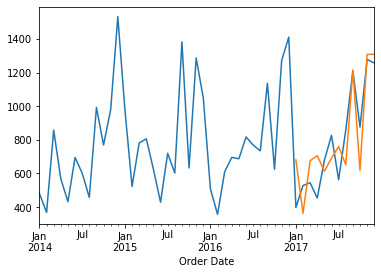

In [71]:
ax = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')

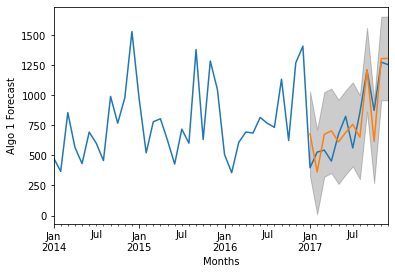

In [74]:
plt.figure()
ax = y['2014':].plot(label='actual') # ACTUAL DATA PLOT
pred.predicted_mean.plot(ax=ax, label='One-Step-Ahead Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
# BASE LINE-> index, lower confidence limit, upper confidence limit
ax.set_xlabel('Months')
ax.set_ylabel('Algo 1 Forecast')
plt.show()